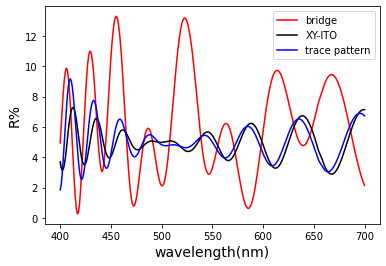

bridge: 6.204239526313959
xy-ITO: 4.965949410509292
pattern: 5.0398001875226095
delta_d_t: 0.5121371651113594
delta_d_b: 3.308885620505671
bridge: (28.974683479692672, -0.519705695596201, -3.325385390735003)
xy-ITO: (26.41852884938733, 0.44093939392941817, -0.965466026368389)
pattern: (26.396011743317437, 0.6175341559906677, -1.576831539783763)


In [9]:
import CIE
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
import matplotlib.pyplot as plt

sub = ml.open_material('sodalime', 'Material')
SiO2_L = ml.open_material('SiO2_LENS', 'Sellmeier')
SiN_L = ml.open_material('SiN_LENS', 'Sellmeier')
ITO_L = ml.open_material('ITO_LENS', 'Sellmeier')
OC = ml.open_material('OC_LENS', 'Material')

ITO = ml.Cauchy([1.640727, 0.050604], ITO_L.k, ITO_L.wl_k)
SiN = ml.Cauchy([1.97812451, 0.0100578])
SiO2 = ml.Cauchy([1.50818418, 0.00141496727])

air = ml.Non_Dispersion(1)
#OC = ml.Cauchy([1.51082517, 5.69129102e-03], 9.70850610e-04)
#SiN = ml.Cauchy([1.85001015, 3.50497748e-03], 4.50757521e-04)
#SiO2 = ml.Cauchy([1.48878307, 1.44759349e-03], 8.82534146e-04)
#ITO = ml.Cauchy([1.68689504, 5.38710310e-02], 8.33721475e-03)
#sub = ml.Cauchy([1.52990893, 1.48423855e-03])


wl = np.linspace(400, 700, 301)
#L = pd.read_csv('./CIE/linCIE2008v2e_1.csv')[10:-130]['L'].values

hypo_bri = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, OC, ITO, SiO2, SiN, sub],
    [None, th[0]-1400, th[1], th[2], th[3], 1250, 200, th[4], th[5], None]
).reflectance(wl)

hypo_dia = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sub],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl)

hypo_tra = lambda th: tm.Design(
    [air, OC, SiN, SiO2, SiO2, SiN, sub],
    [None, th[0], th[1], th[2], th[4], th[5], None]
).reflectance(wl)

f1 = [1707,12,27.1,20,37.1,12]
f2 = [2122.28929493,28,30,27.,30.,8.6]
f3 = [2122.28929493,14.71580371,36.65970178,32.,45.,8.62266763]
f4 = [1729.79214328,14.48240497,38.032268,29.89295768,46.99689601,6.5993801 ]
f5 = [1728.01115927,14.3870235,38.11820806,29.69018659,46.6469324,6.95233569]
f6 = [1717.37238713,14.44418993,32.21384678,22.66133977,33.72499576,9.04278654]
f7 = [2250.56382882,13.49562472,25.06644048,20.00613518,35.05068117,12.78743588]
f8 = [1750.94447882,24.50967406,31.87328912,22.93426661,29.4735891,16.22639783]
f9 = [1709.83443976,20.8817858,21.54939596,57.01125283,32.74004512,11.92598334]
tk = f7

plt.plot(wl, 100*hypo_bri(tk), '-r', label = 'bridge')
plt.plot(wl, 100*hypo_dia(tk), '-k', label = 'XY-ITO')
plt.plot(wl, 100*hypo_tra(tk), '-b', label = 'trace pattern')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('LENS_rev1_sim_OC.png')
plt.show()

print('bridge:',100*np.mean(hypo_bri(tk)))
print('xy-ITO:',100*np.mean(hypo_dia(tk)))
print('pattern:',100*np.mean(hypo_tra(tk)))
print('delta_d_t:',np.mean(abs(100*hypo_tra(tk)-100*hypo_dia(tk))))
print('delta_d_b:',np.mean(abs(100*hypo_bri(tk)-100*hypo_dia(tk))))
#print('bridge:', 116*np.cbrt(sum(hypo_bri(tk)*L)/sum(L))-16)
#print('xy-ITO:',116*np.cbrt(sum(hypo_dia(tk)*L)/sum(L))-16)
#print('pattern:',116*np.cbrt(sum(hypo_tra(tk)*L)/sum(L))-16)
print('bridge:',CIE.Lab(hypo_bri(tk)))
print('xy-ITO:',CIE.Lab(hypo_dia(tk)))
print('pattern:',CIE.Lab(hypo_tra(tk)))
plt.show()

In [ ]:
for i in 

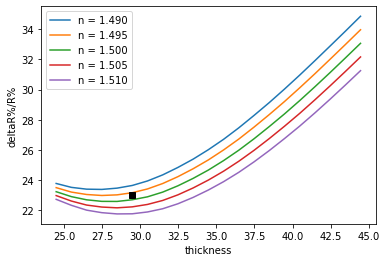

In [8]:
for x in np.linspace(1.49,1.51,5):
    SiO2 = ml.Non_Dispersion(x)
    hypo_dia = lambda th: tm.Design(
        [air, OC, SiN, SiO2, ITO, SiO2, SiN, sub],
        [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
    ).reflectance(wl, 5)
    dtl = []
    dbl = []
    d = np.linspace(24.47, 44.47, 21)
    for y in d:
        tk = [2300,24.50967406,31.87328912,22.93426661,y,16.22639783]
        delta_d_t = np.mean(abs(100*(hypo_dia(tk)-hypo_tra(tk))))
        delta_d_b = np.mean(abs(100*(hypo_dia(tk)-hypo_bri(tk))))
        dt = (100*delta_d_t/np.mean(100*hypo_dia(tk)))
        db = (100*delta_d_b/np.mean(100*hypo_dia(tk))) 
        dtl.append(dt)
        #dbl.append(db)
    plt.plot(d, dtl, label = 'n = {:.3f}'.format(x))
    #plt.plot(d, dbl, label = 'n = {:.3f}'.format(x))
plt.plot(29.4735891, 23, 'ks')
plt.xlabel('thickness')
plt.ylabel('deltaR%/R%')
plt.legend(loc = 'best')
#plt.savefig('rev1_SiO2_trace.png')
plt.show()

In [ ]:
plt.plot(wl, 100*hypo_tra(tk)-100*hypo_dia(tk), '-b')
plt.plot(wl, -np.ones(np.size(wl)),'--k')
plt.plot(wl, np.ones(np.size(wl)),'--k')
plt.savefig('LENS_rev1_sim_delta_d_t.png')
plt.show()

In [ ]:
plt.plot(wl, 100*hypo_bri(tk)-100*hypo_dia(tk), '-r')
plt.plot(wl, -np.ones(np.size(wl)),'--k')
plt.plot(wl, np.ones(np.size(wl)),'--k')
plt.savefig('LENS_rev1_sim_delta_d_b.png')
plt.show()